<img src = "https://drive.google.com/uc?export=view&id=1kl2OFnF2FADAAKjgZUFPo8dsBQUSIJM7" alt = "Encabezado MLDS" width = "100%">  </img>

# Integrantes
+ Ivonne Ruiz
+ David Ovalle
+ Juan Escobar


# **Entendimiento y Preparación de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
!wget https://raw.githubusercontent.com/v1sstar/credit_risk/refs/heads/main/credit_risk_dataset.csv/credit_risk_dataset.csv

--2025-10-23 18:05:00--  https://raw.githubusercontent.com/v1sstar/credit_risk/refs/heads/main/credit_risk_dataset.csv/credit_risk_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1772100 (1.7M) [text/plain]
Saving to: ‘credit_risk_dataset.csv.1’

credit_risk_dataset 100%[===================>]   1.69M  --.-KB/s    in 0.06s   

2025-10-23 18:05:01 (29.9 MB/s) - ‘credit_risk_dataset.csv.1’ saved [1772100/1772100]



In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## **1. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?
- ¿En qué formato están guartdados los datos?
- ¿Qué tamaño en MB tiene el conjunto?

**¿Cuántos documentos tiene el dataset? ¿Qué tamaño en MB tiene el conjunto?**

In [ ]:
# Dimension conjunto de datos
numero_registros = df.shape[0]
numero_columnas = df.shape[1]

# Tamaño del conjunto de datos
tamaño_dset = sys.getsizeof(df) / (1024 ** 2)

print(f'El conjunto de datos tiene un total de {numero_registros} filas, {numero_columnas} columnas y ocupa {round(tamaño_dset,2)} Mb')

El conjunto de datos tiene un total de 32581 filas, 12 columnas y ocupa 8.63 Mb


**¿En qué formato están guartdados los datos?**

Los datos utilizados provienen de la plataforma [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) y se encuentran en formato *.csv*.

Para el procesamiento de la información, el dataset fue cargado en el siguiente [repositorio de GitHub](https://raw.githubusercontent.com/v1sstar/credit_risk/refs/heads/main/credit_risk_dataset.csv/credit_risk_dataset.csv), para descargarlo en formato raw usando *!wget*.

### **1.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?
- ¿Existen documentos ilegibles o con problemas de codificación?
- ¿Hay mezcla de formatos en el conjunto?

**¿Hay datos faltantes o documentos vacíos?**

In [ ]:
# Conteo total valores NaN por cada columna
total_nan = df.isnull().sum()

print("Número de valores nulos por cada columna del conjunto de datos:")
print(total_nan)

Número de valores nulos por cada columna del conjunto de datos:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Esto confirma datos faltantes en los campos de 'person_emp_length' (895) y 'loan_int_rate' (3116).

**¿Existen documentos ilegibles o con problemas de codificación?
¿Hay mezcla de formatos en el conjunto?**

In [ ]:
print("Información de los tipos de datos de cada columna:")
# Usamos df.info() para ver los Dtypes
df.info()

Información de los tipos de datos de cada columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
me

Se muestra un tipo de dato único y consistente para cada columna.

In [ ]:
print("="*50)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*50)
print("Valores únicos para cada variable categórica.\n")

categorical_cols = df.select_dtypes(include=['object']).columns

# añadimos 'loan_status' por ser la etiqueta (target) y la tratamos como categórica
target_col = ['loan_status']
all_categorical = list(categorical_cols) + target_col

for col in all_categorical:
    print(f"--- Columna: '{col}' ---")

    # Contamos la frecuencia de cada categoría
    print("Distribución de valores:")
    print(df[col].value_counts(dropna=False)) # dropna=False para ver si hay NaN
    print("-" * (len(col) + 16) + "\n")

ANÁLISIS DE VARIABLES CATEGÓRICAS
Valores únicos para cada variable categórica.

--- Columna: 'person_home_ownership' ---
Distribución de valores:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
-------------------------------------

--- Columna: 'loan_intent' ---
Distribución de valores:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
---------------------------

--- Columna: 'loan_grade' ---
Distribución de valores:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
--------------------------

--- Columna: 'cb_person_default_on_file' ---
Distribución de valores:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
-----------------------------------------

--- Columna: 'loan_status' ---


Las categorías de las diferentes variables son claras, y la variable objetivo 'loan_status' está correctamente definida como 0 y 1.

**¿Hay datos de mala calidad?**

In [ ]:
print("\n\n" + "="*80)
print("ANÁLISIS DE VARIABLES NUMÉRICAS")
print("="*80)

# columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns

# excluimos 'loan_status' que ya analizamos como categórica
numerical_cols = numerical_cols.drop('loan_status')

print(df[numerical_cols].describe().T.round(2))



ANÁLISIS DE VARIABLES NUMÉRICAS
                              count      mean       std      min       25%  \
person_age                  32581.0     27.73      6.35    20.00     23.00   
person_income               32581.0  66074.85  61983.12  4000.00  38500.00   
person_emp_length           31686.0      4.79      4.14     0.00      2.00   
loan_amnt                   32581.0   9589.37   6322.09   500.00   5000.00   
loan_int_rate               29465.0     11.01      3.24     5.42      7.90   
loan_percent_income         32581.0      0.17      0.11     0.00      0.09   
cb_person_cred_hist_length  32581.0      5.80      4.06     2.00      3.00   

                                 50%       75%         max  
person_age                     26.00     30.00      144.00  
person_income               55000.00  79200.00  6000000.00  
person_emp_length               4.00      7.00      123.00  
loan_amnt                    8000.00  12200.00    35000.00  
loan_int_rate                  10.99

Se observan indicios de valores atípicos (outliers) o errores de datos:

* person_age: El 75% de las personas tienen 30 años o menos, pero el valor máximo es 144.

* person_income: El valor máximo (6'000.000) es significativamente más alto que el percentil 75, lo que sugiere una distribución con cola derecha (outliers).

* person_emp_length: El valor máximo es de 123 años de empleo, lo cual corresponde a un dato incoherente en el contexto del problema.

* loan_int_rate: Hay valores NaN, y el rango de tasas parece amplio.

Los siguientes gráficos permiten identificar visualmente estos valores atípicos.

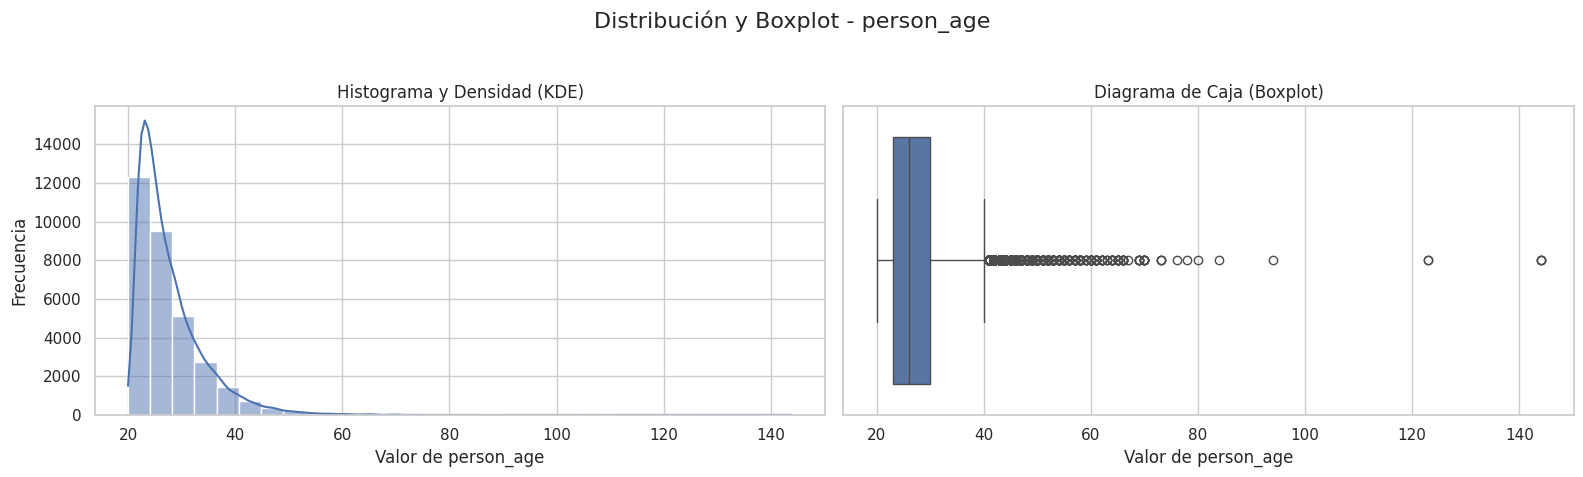

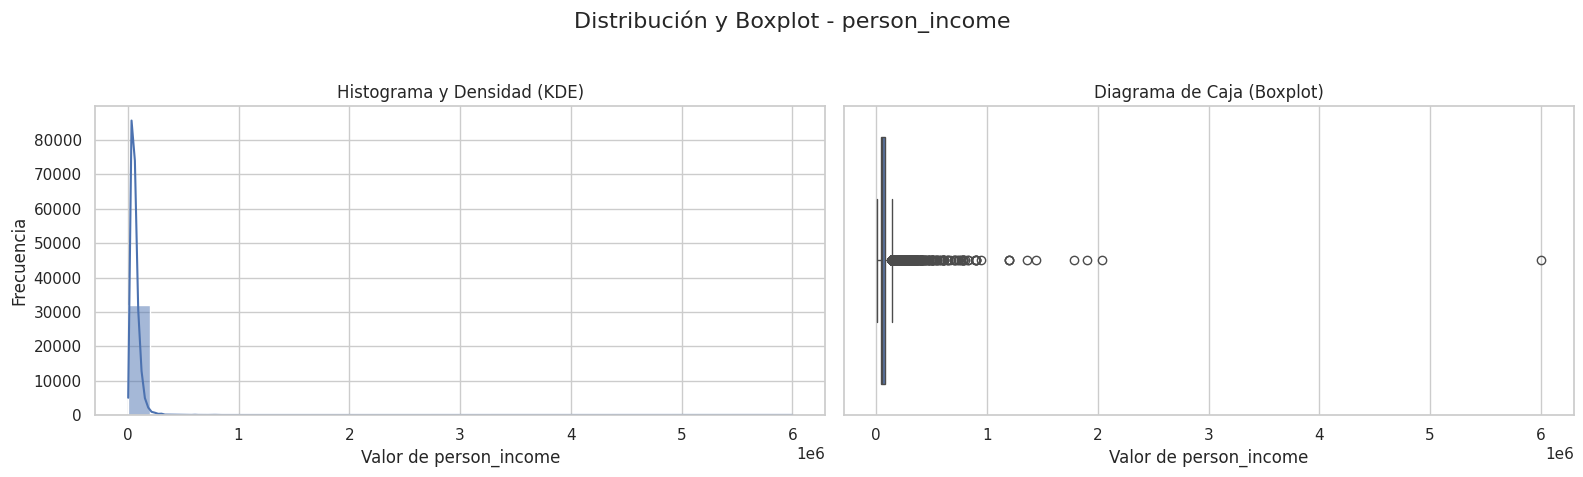

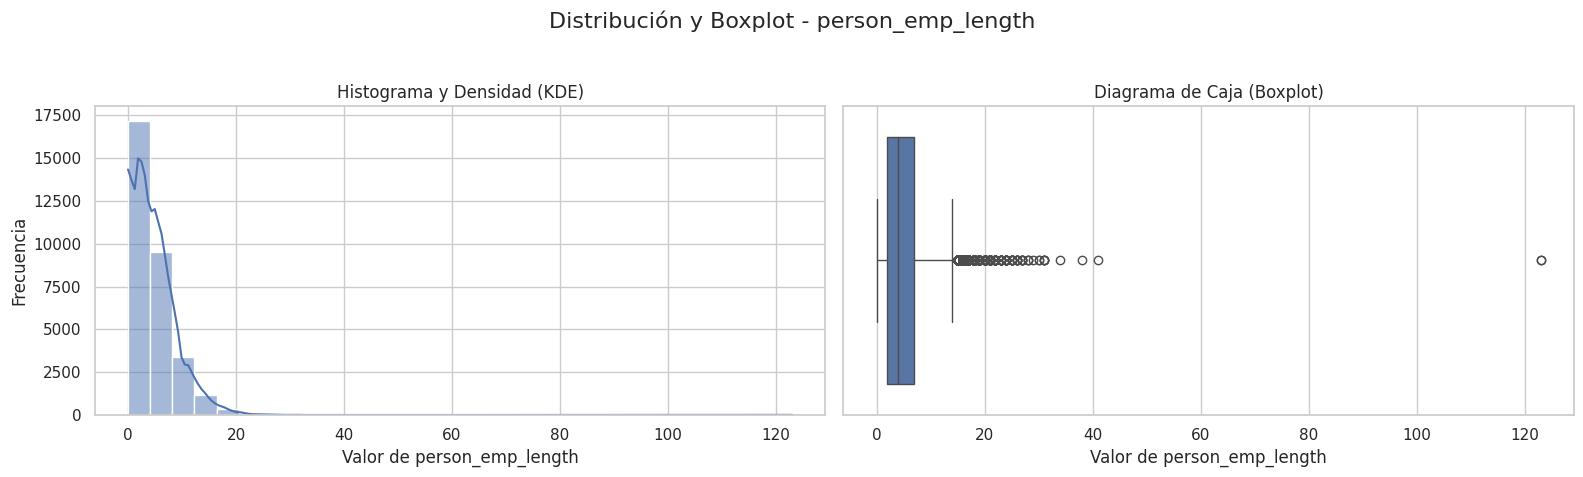

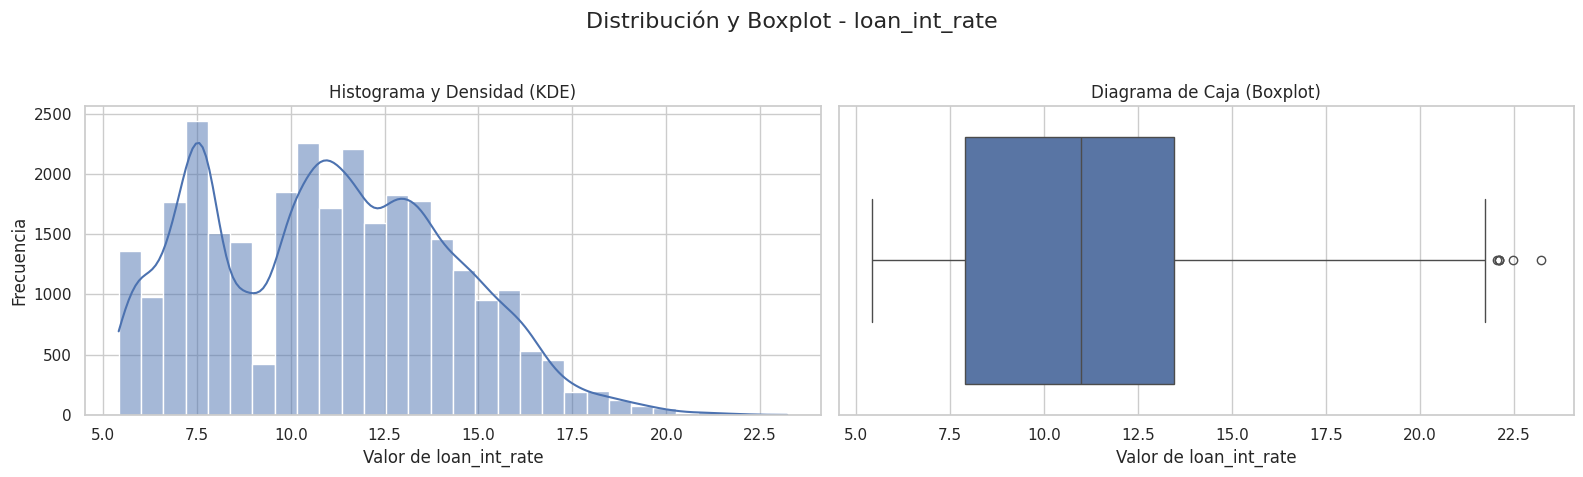

In [ ]:
sns.set(style="whitegrid")

cols_to_plot = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_int_rate'
]

for col in cols_to_plot:

    # figura con 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'Distribución y Boxplot - {col}', fontsize=16)

    # --- Gráfico 1: Histograma + KDE (Distribución) ---
    sns.histplot(data=df, x=col, kde=True, ax=axes[0], bins=30)
    axes[0].set_title('Histograma y Densidad (KDE)')
    axes[0].set_xlabel(f'Valor de {col}')
    axes[0].set_ylabel('Frecuencia')

    # --- Gráfico 2: Boxplot (Outliers) ---
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title('Diagrama de Caja (Boxplot)')
    axes[1].set_xlabel(f'Valor de {col}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### **1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?

Sí. La variable objetivo es loan_status, donde 1 indica que el préstamo entró en default (no se pagó la obligación) y 0 indica que no entró en default (si se pagó la obligación). Es una variable categórica binaria, óptima para la implementación de un modelo de deep learning orientado a resolver problemas de clasificación.




- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

En la siguiente gráfica se muestra la distribución de la variable objetivo. Se observa un marcado desbalance de clases, ya que la clase mayoritaria (no default) supera ampliamente a la clase minoritaria (default), una situación común en el ámbito del riesgo crediticio.

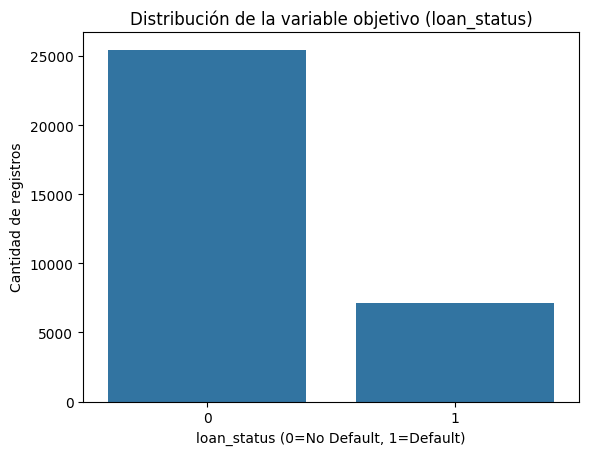

In [ ]:
sns.countplot(x="loan_status", data=df)
plt.title("Distribución de la variable objetivo (loan_status)")
plt.xlabel("loan_status (0=No Default, 1=Default)")
plt.ylabel("Cantidad de registros")
plt.show()

Específicamente, el 78% de los registros corresponden a casos con flag de cumplimiento (no default), mientras que solo el 21% presentan flag de incumplimiento (default). En otras palabras, por cada registro de incumplimiento existen aproximadamente tres de cumplimiento, lo que confirma un marcado desbalance en la distribución de la variable objetivo.


In [ ]:
# Porcentaje por clase
dist = df['loan_status'].value_counts(normalize=True)
print(dist)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

Sí. Hay variables numéricas y categóricas asociadas al cliente y su préstamo:

* Variables numéricas: person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length.

* Variables categóricas: person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file, loan_status (variable objetivo).

En la siguiente tabla se muestra la descripción de cada una de las variables:

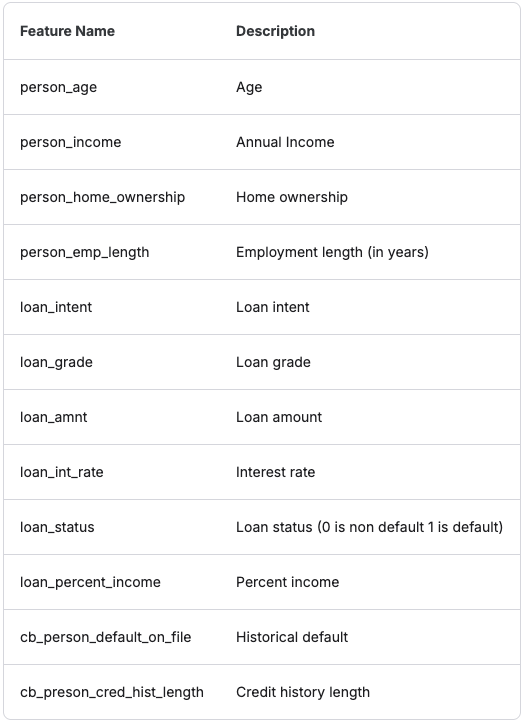


A continuación se presenta un breve resumen con las estadísticas descriptivas orientadas a estas variables.

#### Tipos de variables y valores nulos

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


#### Resumen estadístico para variables numéricas:

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### Distribución de variables numéricas

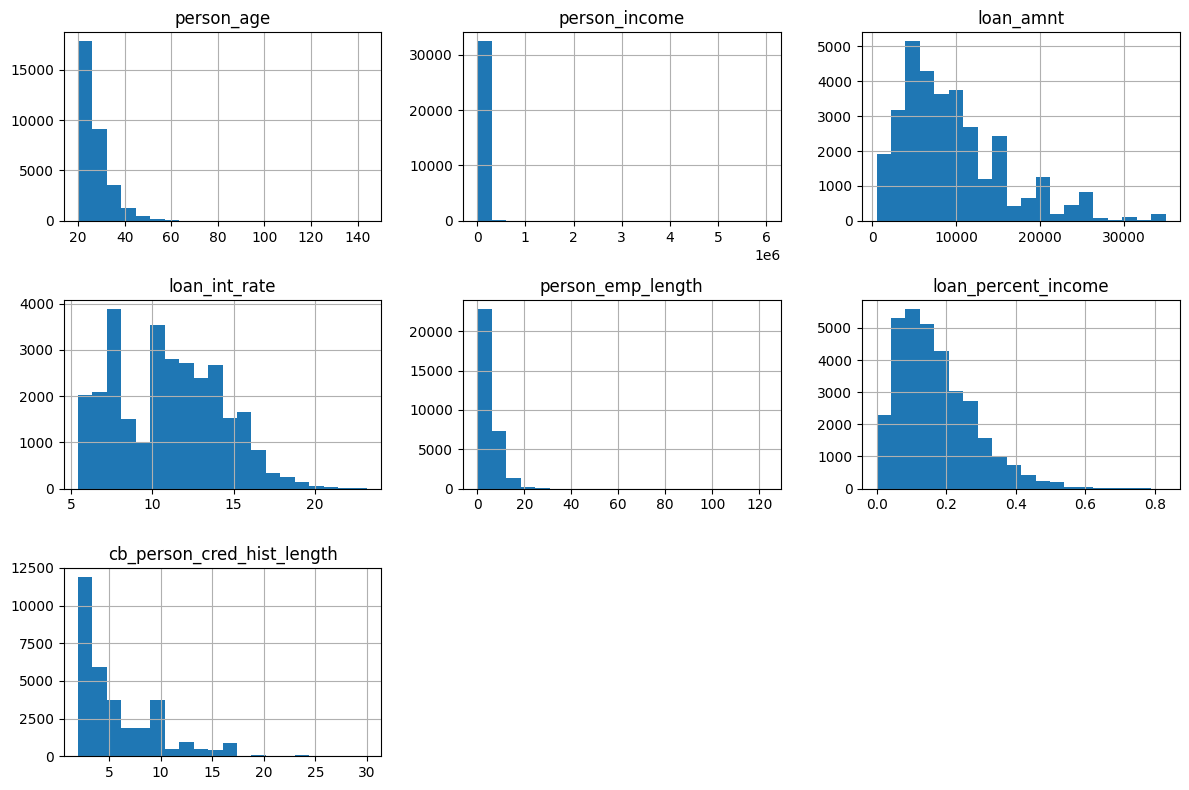

In [ ]:
# Distribución de variables numéricas
df[["person_age", "person_income", "loan_amnt", "loan_int_rate", "person_emp_length", "loan_percent_income", "cb_person_cred_hist_length"]].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

#### Distribución de variables categóricas

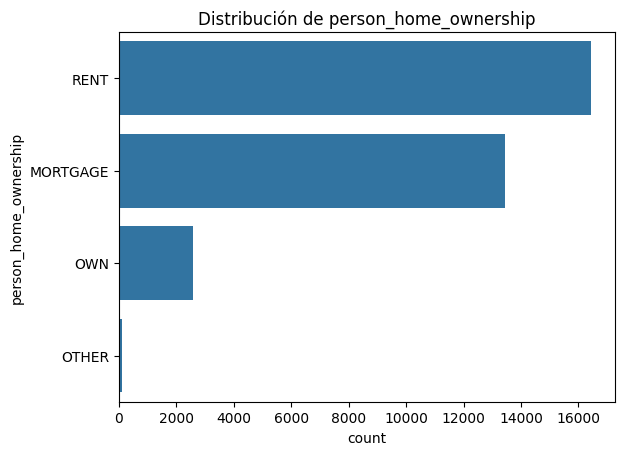

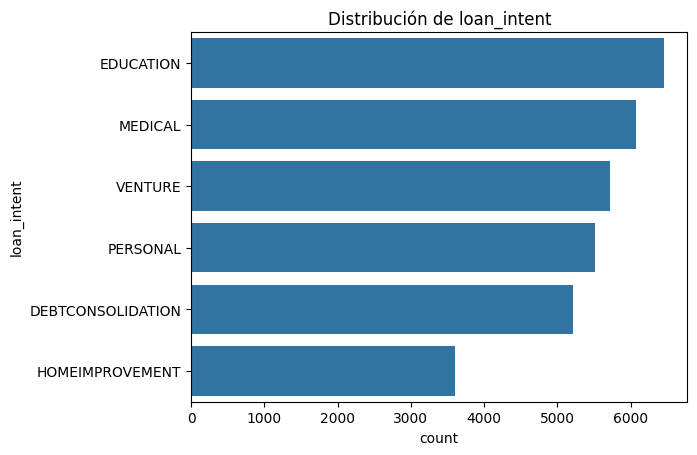

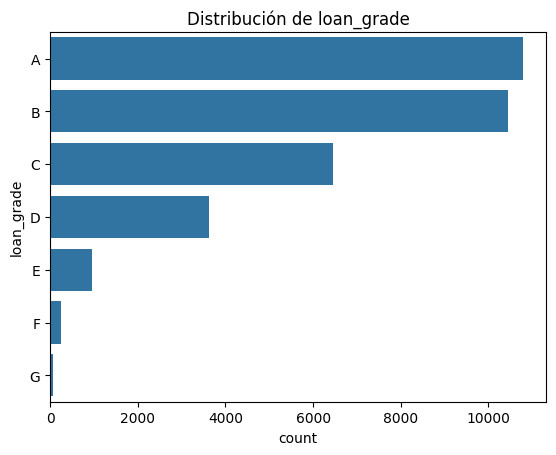

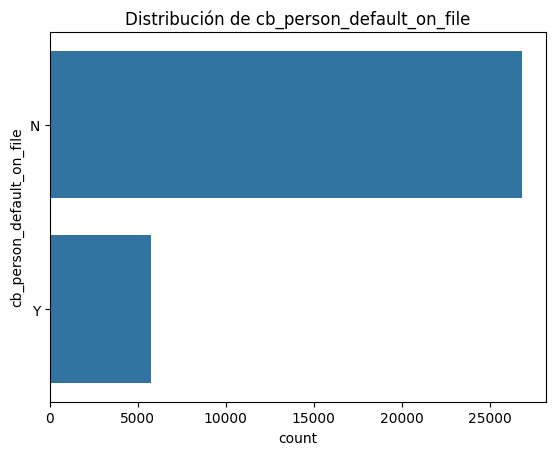

In [ ]:
# Distribución de variables categóricas
cat_vars = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in cat_vars:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.show()


En principio, se procurará utilizar todas las variables disponibles para maximizar la capacidad discriminante del modelo de deep learning que se desarrollará. No obstante, si durante el proceso de modelado se identifica que alguna variable es redundante o aporta poco a la capacidad predictiva, se considerará su exclusión con el fin de optimizar la eficiencia computacional del modelo.

### **1.4. Relación Entre Variables**
---

- Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.

A continuación se presenta una matriz de correlación que facilita la identificación de redundancias y relaciones directas entre este tipo de variables.

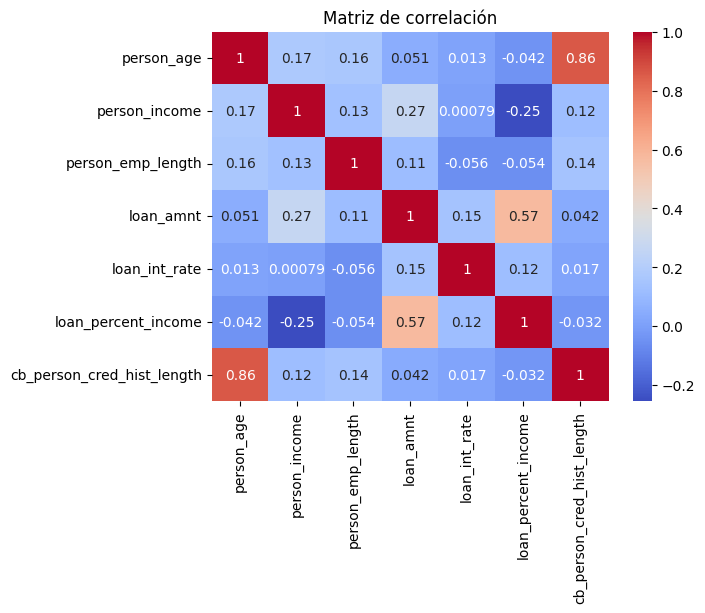

In [ ]:
# Matriz de correlación variables numéricas (excluyendo 'loan_status')
cols_numericas = df.select_dtypes(include='number').columns.drop('loan_status')
corr = df[cols_numericas].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()



La matriz de correlación revela que la mayoría de las variables numéricas del conjunto de datos presentan correlaciones bajas entre sí, lo que indica un bajo nivel de redundancia. Las únicas correlaciones destacables son entre person_age y cb_person_cred_hist_length (0.86), lo que sugiere que la longitud del historial crediticio tiene una relación directa con la edad de la persona, a mayor edad, mayor suele ser el historial crediticio. También se observa una correlación moderada entre loan_amnt y loan_percent_income (0.57), lo que implica que a medida que aumenta el monto del préstamo, también lo hace el porcentaje de ingreso destinado a este. En general, la baja correlación entre la mayoría de variables sugiere que cada una podría estar aportando información distinta al modelo, minimizando el riesgo de multicolinealidad.

Adicionalmente, a partir del contenido de la base de datos, resulta relevante analizar la relación específica entre el nivel de ingreso de la persona y el monto del préstamo otorgado. Este análisis puede ayudar a identificar posibles tendencias, como si aquellas personas con mayores ingresos tienden a cumplir mejor sus obligaciones crediticias o, por el contrario, si existe una correlación negativa entre ambas variables.



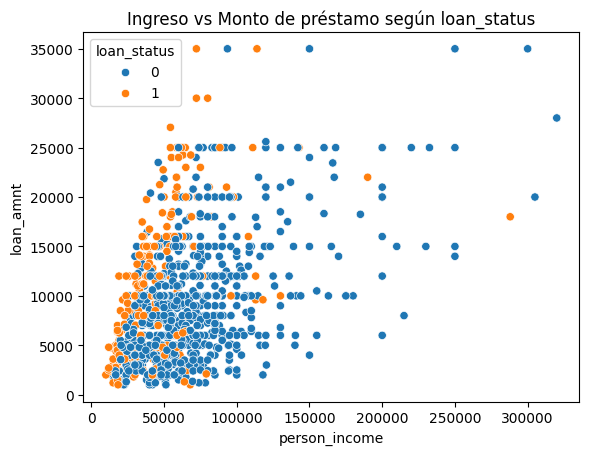

In [ ]:
# Relación entre ingresos y monto de préstamo según default
sns.scatterplot(x="person_income", y="loan_amnt", hue="loan_status", data=df.sample(1000, random_state=1))
plt.title("Ingreso vs Monto de préstamo según loan_status")
plt.show()


La gráfica ilustra la relación entre el ingreso de la persona (person_income) y el monto del préstamo otorgado (loan_amnt), diferenciando los puntos según el estado del préstamo (loan_status), donde 0 corresponde a cumplimiento y 1 a incumplimiento. Se observa una concentración significativa de solicitudes con ingresos y montos relativamente bajos, mientras que a medida que aumentan los ingresos, la dispersión de los montos de préstamo también se incrementa. Sin embargo, no se aprecia una tendencia clara que indique que un mayor ingreso se traduzca consistentemente en un menor riesgo de incumplimiento, ya que los casos de incumplimiento (puntos naranjas) se encuentran distribuidos en distintos niveles de ingreso y monto. Esto sugiere que factores adicionales, más allá del simple nivel de ingreso, influyen en el comportamiento de pago de los solicitantes.

- Identifique si hay redundancia entre las variables para una posterior eliminación o selección.

Como se mostró en la gráfica de correlación presentada previamente, se observa una correlación considerablemente alta (0.86) entre las variables person_age y cb_person_cred_hist_length. Este nivel de correlación sugiere que ambas variables contienen información similar, lo que podría implicar redundancia desde el punto de vista estadístico.

Sin embargo, en esta etapa inicial, optamos por conservar la totalidad de las variables para un primer ejercicio de modelamiento, esto con el fin de evaluar el aporte discriminante real de cada una en el desempeño del modelo. Si durante el entrenamiento y la validación se identifica que una de estas dos variables no contribuye significativamente a la capacidad predictiva del modelo, se considerará su exclusión para evitar problemas de multicolinealidad y redundancia, optimizando así la robustez y generalización del modelo de predicción de riesgo crediticio que vamos a construir.

## **2. Limpieza de los Datos**
---

### **2.1 Tratamiento de Datos faltantes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
data = {"Cant_null":df[["loan_int_rate","person_emp_length"]].isnull().sum(),
        "media_null":(df[["loan_int_rate","person_emp_length"]].isnull().mean()*100).round(2)}
nulos = pd.DataFrame(data)
nulos

,Cant_null,media_null
loan_int_rate,3116,9.56
person_emp_length,895,2.75


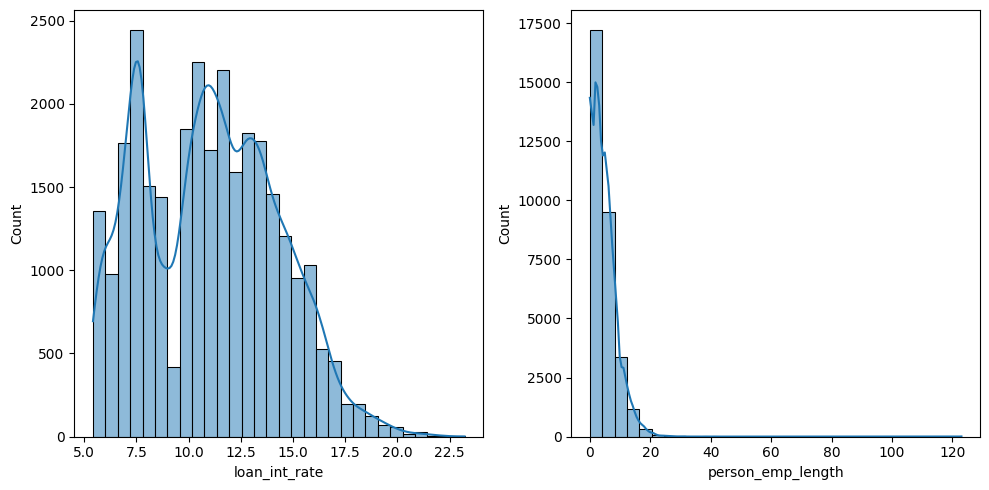

In [ ]:
fig, axe = plt.subplots(1,2,figsize=(10,5))

sns.histplot(df["loan_int_rate"],bins=30,kde=True,ax=axe[0])
sns.histplot(df["person_emp_length"],bins=30,kde=True, ax = axe[1])

plt.tight_layout()
plt.show()

Se seleccionaron las variables numéricas loan_int_rate, person_income, loan_amnt, person_age y cb_person_cred_hist_length.
Se utilizó KNNImputer con n_neighbors=10 para estimar los valores faltantes basándose en los 10 registros más cercanos (vecinos) según la similitud de las demás variables. Esto permite mantener la mayor cantidad de datos posible sin introducir sesgos importantes.

In [ ]:
features_for_imputation = ['loan_int_rate', 'person_income', 'loan_amnt', 'person_age','cb_person_cred_hist_length']
imputer = KNNImputer(n_neighbors=10)
df[features_for_imputation] = imputer.fit_transform(df[features_for_imputation])

Eliminación de filas con valores faltantes:
Después de la imputación, se creó un nuevo DataFrame df_nonnall eliminando todas las filas que aún contuvieran valores nulos. Esto garantiza que cualquier análisis posterior se realice únicamente con datos completos, evitando errores o inconsistencias.

In [ ]:
df_nonnall= df.dropna(axis=0) # Eliminación de datos faltantes

### **2.2 Duplicados**

In [ ]:
df_nonnall.duplicated().sum()

np.int64(0)

In [ ]:
df_nonnall.drop_duplicates(inplace=True)

/tmp/ipython-input-3858295913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonnall.drop_duplicates(inplace=True)


### **2.3 Outliers y  Estandarización**

Se eliminaron registros con valores que son física o lógicamente imposibles:
- person_age > 100: Edades irrealmente altas (probables errores de captura)
- person_emp_length > 80: Años de empleo imposibles (nadie trabaja 80+ años)

Estos filtros ayudan a:
1. Mejorar la calidad de los datos
2. Evitar que valores extremos erróneos afecten el modelo
3. Mantener solo registros con información realista y confiable

In [ ]:
numericos = df.select_dtypes(include="number")
categoricos = df.select_dtypes(include=["object","category"])

In [ ]:
numericos.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22.0,59000.0,123.0,35000.0,16.02,1,0.59,3.0
1,21.0,9600.0,5.0,1000.0,11.14,0,0.10,2.0
2,25.0,9600.0,1.0,5500.0,12.87,1,0.57,3.0
3,23.0,65500.0,4.0,35000.0,15.23,1,0.53,2.0
4,24.0,54400.0,8.0,35000.0,14.27,1,0.55,4.0


8


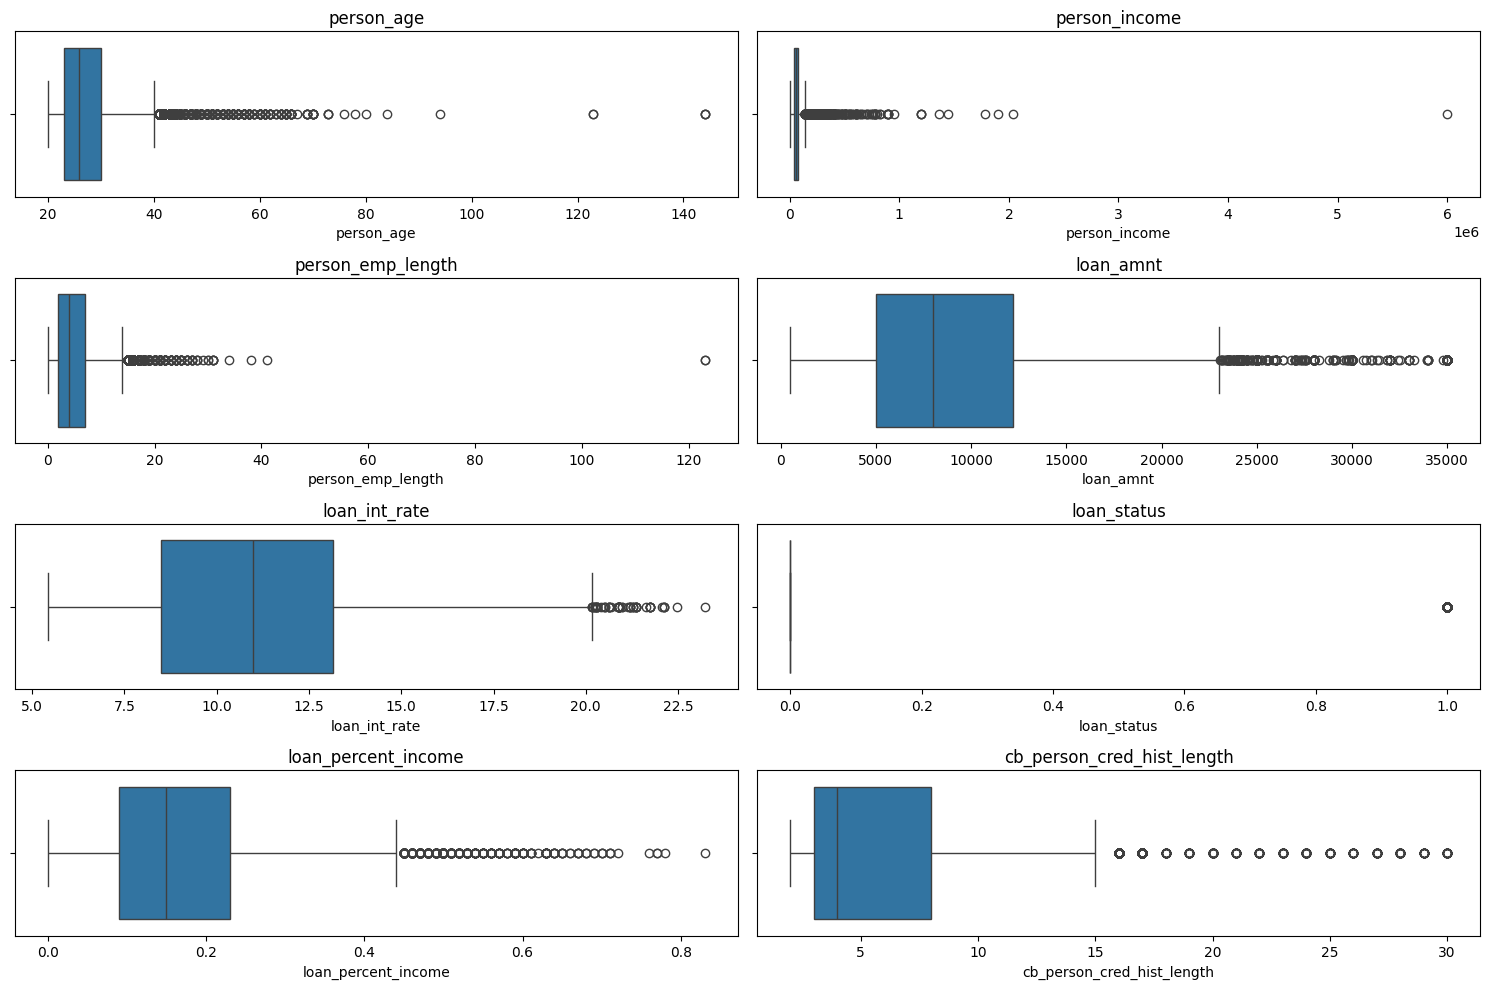

In [ ]:
print(len(numericos.columns))
fig, axes = plt.subplots(4,2,figsize=(15,10))
axes = axes.flatten()
for i, col in enumerate(numericos.columns[::]):
  sns.boxplot(x=df[col],ax=axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
# Valores imposibles
df_nonnall = df_nonnall.query("person_age <= 100 and person_emp_length <= 80")

#### Estandarización de Variables Numéricas

Se utilizó StandardScaler de la librería sklearn para estandarizar las variables numéricas, con el objetivo de garantizar que todas las características tengan una media de 0 y una desviación estándar de 1. Esto permite que el modelo realice un análisis más robusto, evitando que los valores extremadamente grandes influyan de manera desproporcionada en el rendimiento del modelo.
Formula

$$z = \frac{x - \mu}{\sigma}$$

Donde:
- `z` → valor estandarizado
- `x` → valor original  
- `μ` → media
- `σ` → desviación estándar

In [ ]:
# Estandarizar datos
scaler = StandardScaler()
numericos_col =  ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']
df_nonnall[numericos_col] = scaler.fit_transform(df_nonnall[numericos_col])

In [ ]:
df_nonnall.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,-1.084249,-1.078678,OWN,0.053786,EDUCATION,B,-1.367672,0.032597,0,-0.655333,N,-0.939103
2,-0.441019,-1.078678,MORTGAGE,-0.936980,MEDICAL,C,-0.657297,0.590925,1,3.766361,N,-0.693013
3,-0.762634,-0.018989,RENT,-0.193905,MEDICAL,C,3.999602,1.352574,1,3.390047,N,-0.939103
4,-0.601827,-0.229410,RENT,0.796861,MEDICAL,C,3.999602,1.042751,1,3.578204,Y,-0.446923
5,-1.084249,-1.072991,OWN,-0.689289,VENTURE,A,-1.130880,-1.258334,1,0.755846,N,-0.939103


In [ ]:
df_limpio = df_nonnall.copy()

# **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*